<a href="https://colab.research.google.com/github/abhinavkr26/DACSS-601-SUMMER-2022-BLOGS/blob/main/Copy_of_ReFED_Senstivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from warnings import filterwarnings

!pip install aesara
from aesara import pprint
from matplotlib import pyplot as plt, ticker
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import StandardScaler

!pip install pymc
!pip install numpyro
import pymc as pm
import pymc.sampling_jax





filterwarnings('ignore', category=RuntimeWarning, message="overflow encountered in exp")
filterwarnings('ignore', category=UserWarning, module='pymc',
               message="Unable to validate shapes: Cannot sample from flat variable")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.3 MB/s 
     |████████████████████████████████| 41 kB 388 kB/s 
  Created wheel for cons: filename=cons-0.4.5-py3-none-any.whl size=9118 sha256=0aa73a7bd46ad2d0f4c1bccf9524f4734f39f986a35e5d60504580e4eec11f79
  Stored in directory: /root/.cache/pip/wheels/82/c9/59/093d33254965d43748af10c13bb61e38599a88ce0885030d10
  Created wheel for logical-unification: filename=logical_unification-0.4.5-py3-none-any.whl size=13772 sha256=4fcf1b5d253d6226cdae2cf1e226fc65d205cf0aa23d9310ed92745f69840f1b
  Stored in directory: /root/.cache/pip/wheels/e7/f3/fc/78701993d9639bd2a14f83c0170bbf1e6d207b9a72fbf054f4
  Created wheel for etuples: filename=etuples-0.3.5-py3-none-any.whl size=12414 sha256=2a5aee1f02fe479aeebdf94e5407d37f2c473c3303218d0c883ac9c6c4262d32
  Stored in directory: /root/.cache/pip/wheels/bd/47/f4/370a2f609688d0c93d90e33ae5a6d245f1a4d14cba1f3

/usr/local/lib/python3.7/dist-packages/aesara/link/jax/dispatch.py:86: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/docs/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/usr/local/lib/python3.7/dist-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import jax

In [ ]:
jax.default_backend(), jax.devices()

('gpu', [GpuDevice(id=0, process_index=0)])

In [ ]:
device = cuda
floatX = 'float32'

NameError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()


import io
refed = pd.read_csv(io.BytesIO(uploaded['refed.csv']))

Saving refed.csv to refed.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
FIG_SIZE = np.array([8, 6])
plt.rc('figure', figsize=FIG_SIZE)

dollar_formatter = ticker.StrMethodFormatter("${x:,.2f}")
pct_formatter = ticker.StrMethodFormatter("{x:.1%}")

sns.set(color_codes=True)

In [ ]:
refed["Identifier"] = refed["cat.year"].astype('Int32').map(str) + "_" + refed["cat.state"].map(str) + "_" + refed["cat.commodity"].map(str)
refed.head()

,cat.year,cat.state,cat.commodity,acres_planted,us_dollars_harvested,tons_surplus.tons_surplus,tons_surplus_sim,Identifier
0,2010.0,Alabama,Peanuts,190000.0,97643000.0,11717.041200,12238.745320,2010_Alabama_Peanuts
1,2010.0,Florida,Peanuts,145000.0,100643000.0,22624.848160,23137.332980,2010_Florida_Peanuts
2,2010.0,Georgia,Peanuts,565000.0,423176000.0,38899.410120,39111.904220,2010_Georgia_Peanuts
3,2010.0,Mississippi,Peanuts,19000.0,13230000.0,2433.313089,2440.146219,2010_Mississippi_Peanuts
4,2010.0,New_Mexico,Peanuts,10000.0,10948000.0,368.772143,372.459864,2010_New_Mexico_Peanuts


In [ ]:
PEANUTS = "2010_Alabama_Peanuts"

refed = refed.set_index(['Identifier'])
# refed.head()


refed.loc[PEANUTS, 'tons_surplus.tons_surplus']

11717.0412

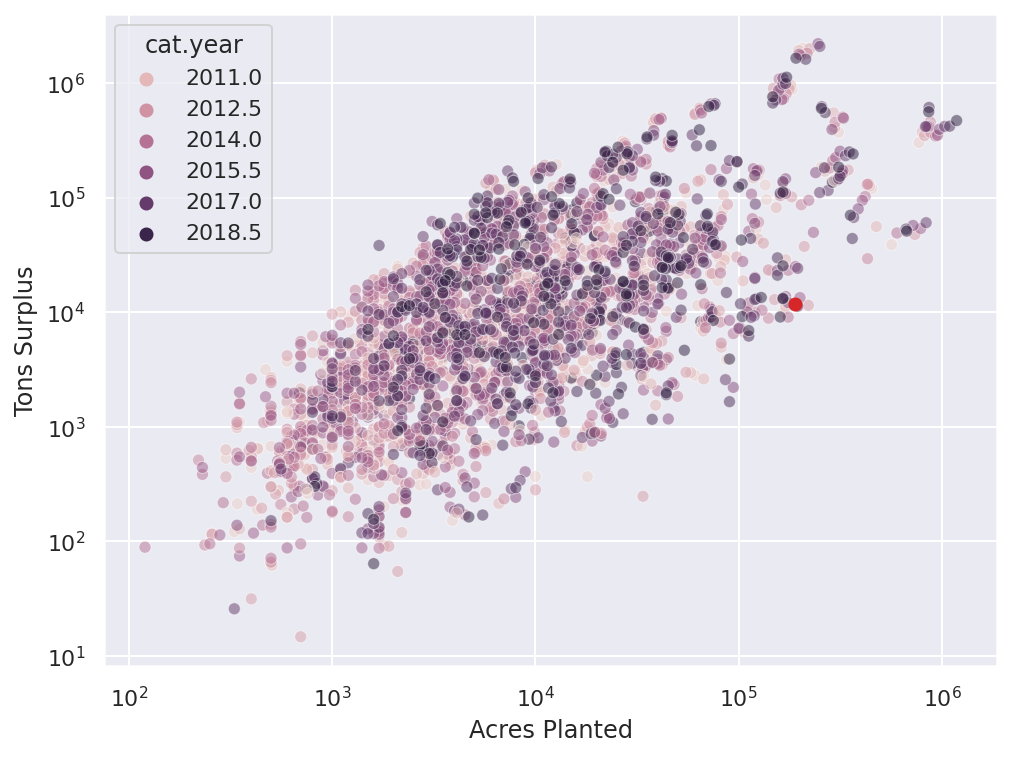

In [ ]:
ax = sns.scatterplot(x="acres_planted", y="tons_surplus.tons_surplus", data=refed,
                     alpha=0.5, hue = "cat.year");

ax.scatter(refed.loc[PEANUTS, "acres_planted"],
           refed.loc[PEANUTS, "tons_surplus.tons_surplus"],
           c='#d62728');

ax.set_xscale('log');

ax.set_yscale('log');

ax.set_ylabel("Tons Surplus");
ax.set_xlabel("Acres Planted");

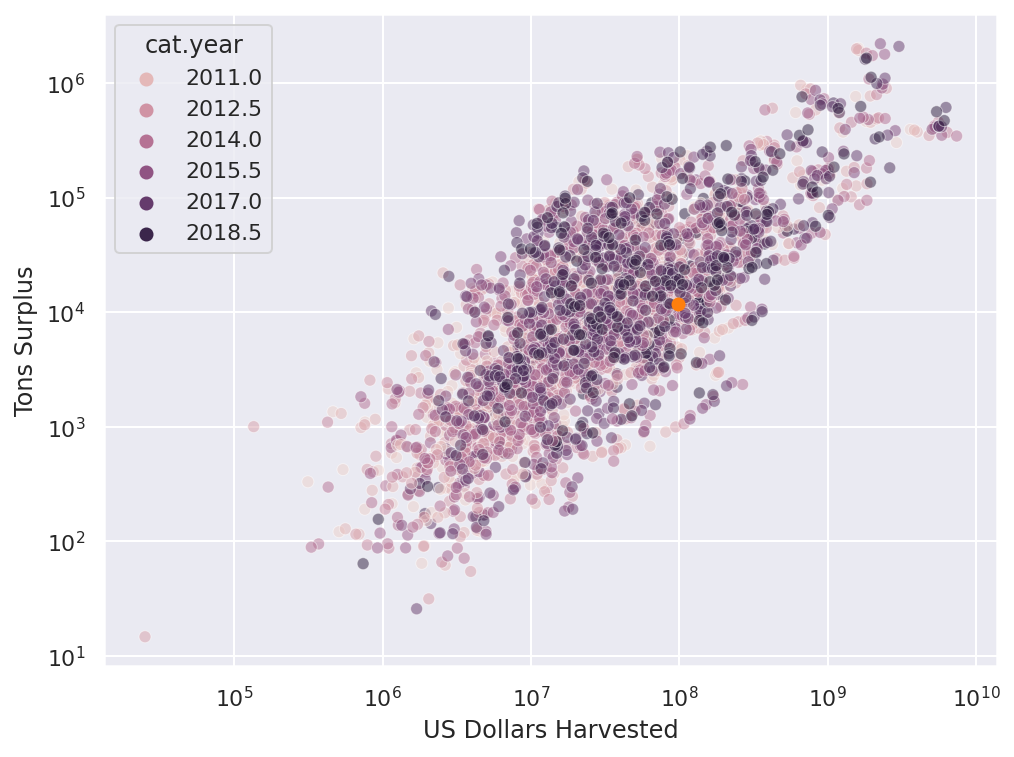

In [ ]:
ax = sns.scatterplot(x="us_dollars_harvested", y="tons_surplus.tons_surplus", data=refed,
                     alpha=0.5, hue = "cat.year");

ax.scatter(refed.loc[PEANUTS, "us_dollars_harvested"],
           refed.loc[PEANUTS, "tons_surplus.tons_surplus"],
           c='#ff7f0e');
ax.set_xscale('log');

ax.set_yscale('log');

ax.set_ylabel("Tons Surplus");
ax.set_xlabel("US Dollars Harvested");

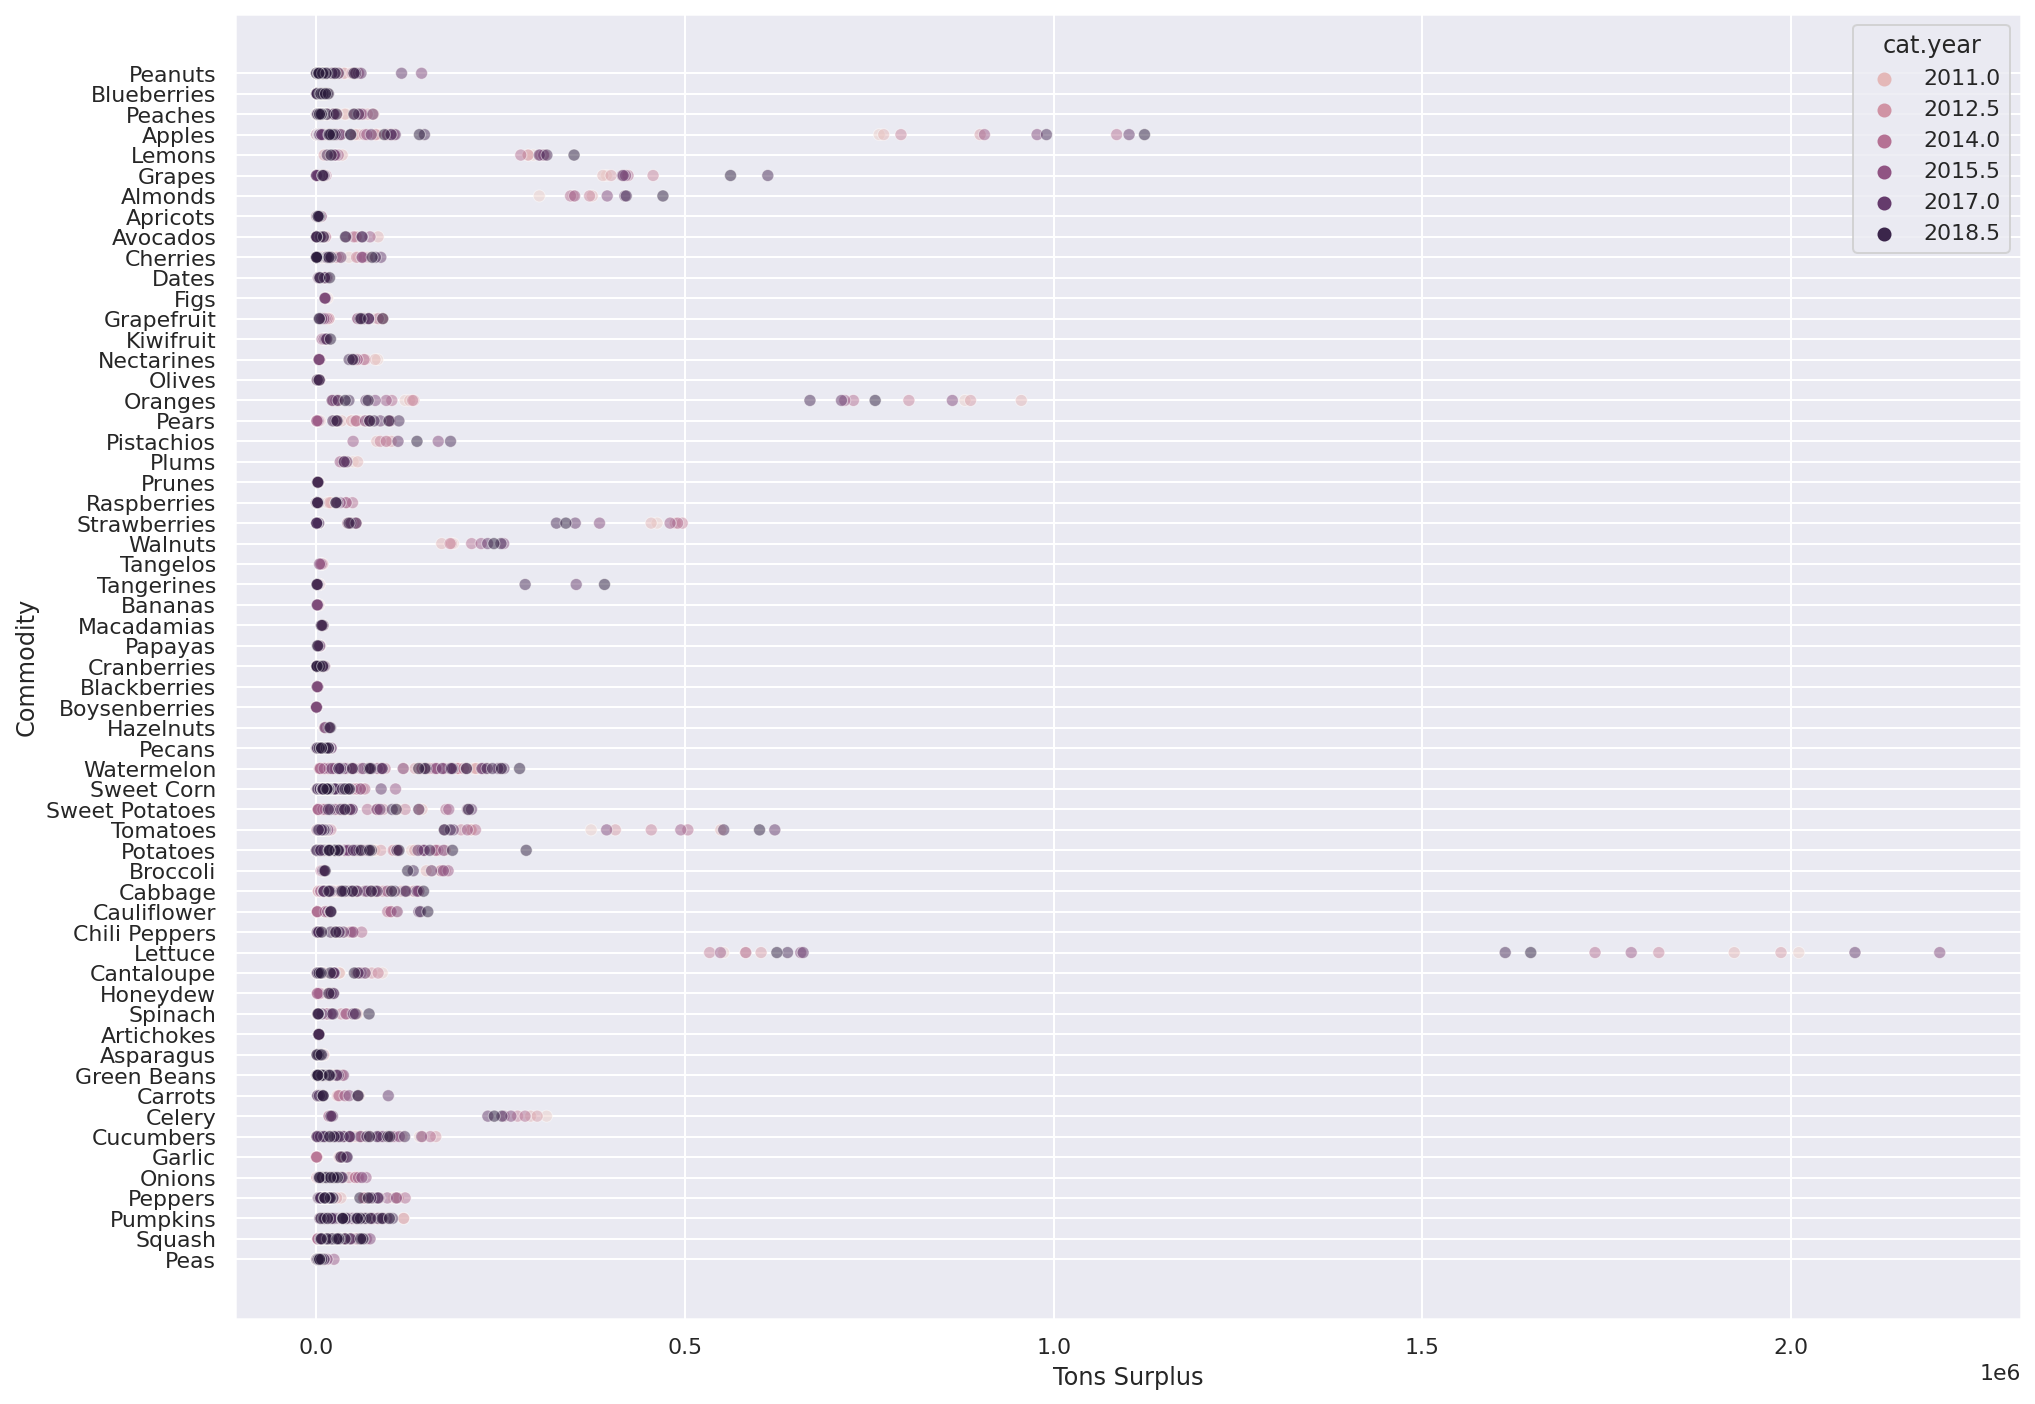

In [ ]:
fig, ax = plt.subplots(figsize=2 * FIG_SIZE)
ax = sns.scatterplot(x="tons_surplus.tons_surplus", y="cat.commodity", data=refed,
                     alpha=0.5, hue = "cat.year");


ax.set_xlabel("Tons Surplus");
ax.set_ylabel("Commodity");

In [ ]:
fig, ax = plt.subplots(figsize=1.5 * FIG_SIZE)
ax = sns.scatterplot(x="tons_surplus.tons_surplus", y="cat.state", data=refed,
                     alpha=0.5, hue = "cat.year");


ax.set_xlabel("Tons Surplus");
ax.set_ylabel("State");

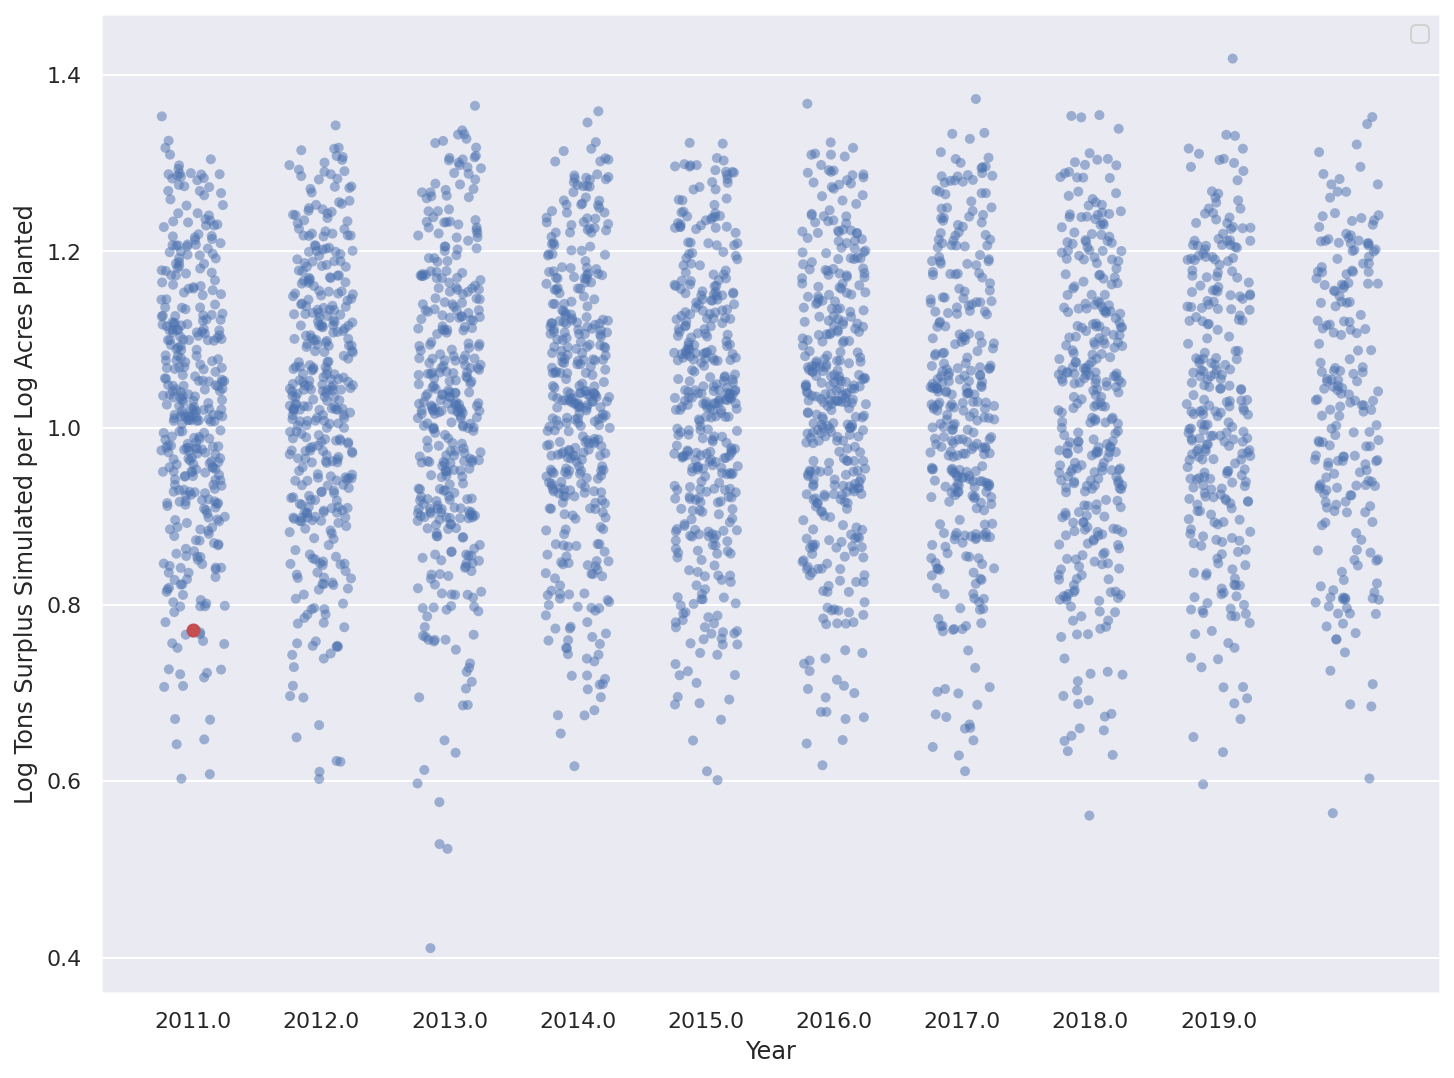

In [ ]:
refed["LLTS/AP"] = (
    refed["tons_surplus.tons_surplus"]
           .pipe(np.log)
           .div(refed["acres_planted"]
                       .pipe(np.log))
)



fig, ax = plt.subplots(figsize=1.5 * FIG_SIZE)

sns.stripplot(x="cat.year", y="LLTS/AP", data=refed,
              jitter=0.25, color='C0', alpha=0.5, ax=ax)
ax.scatter(refed.loc[PEANUTS, "cat.year"] - refed["cat.year"].min(),
           refed.loc[PEANUTS, "LLTS/AP"],
           c='r', zorder=10);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1));

#ax.set_ylim(0.25, 1.5);
ax.set_ylabel("Log Tons Surplus Simulated per Log Acres Planted");
ax.set_xlabel("Year");
ax.legend();

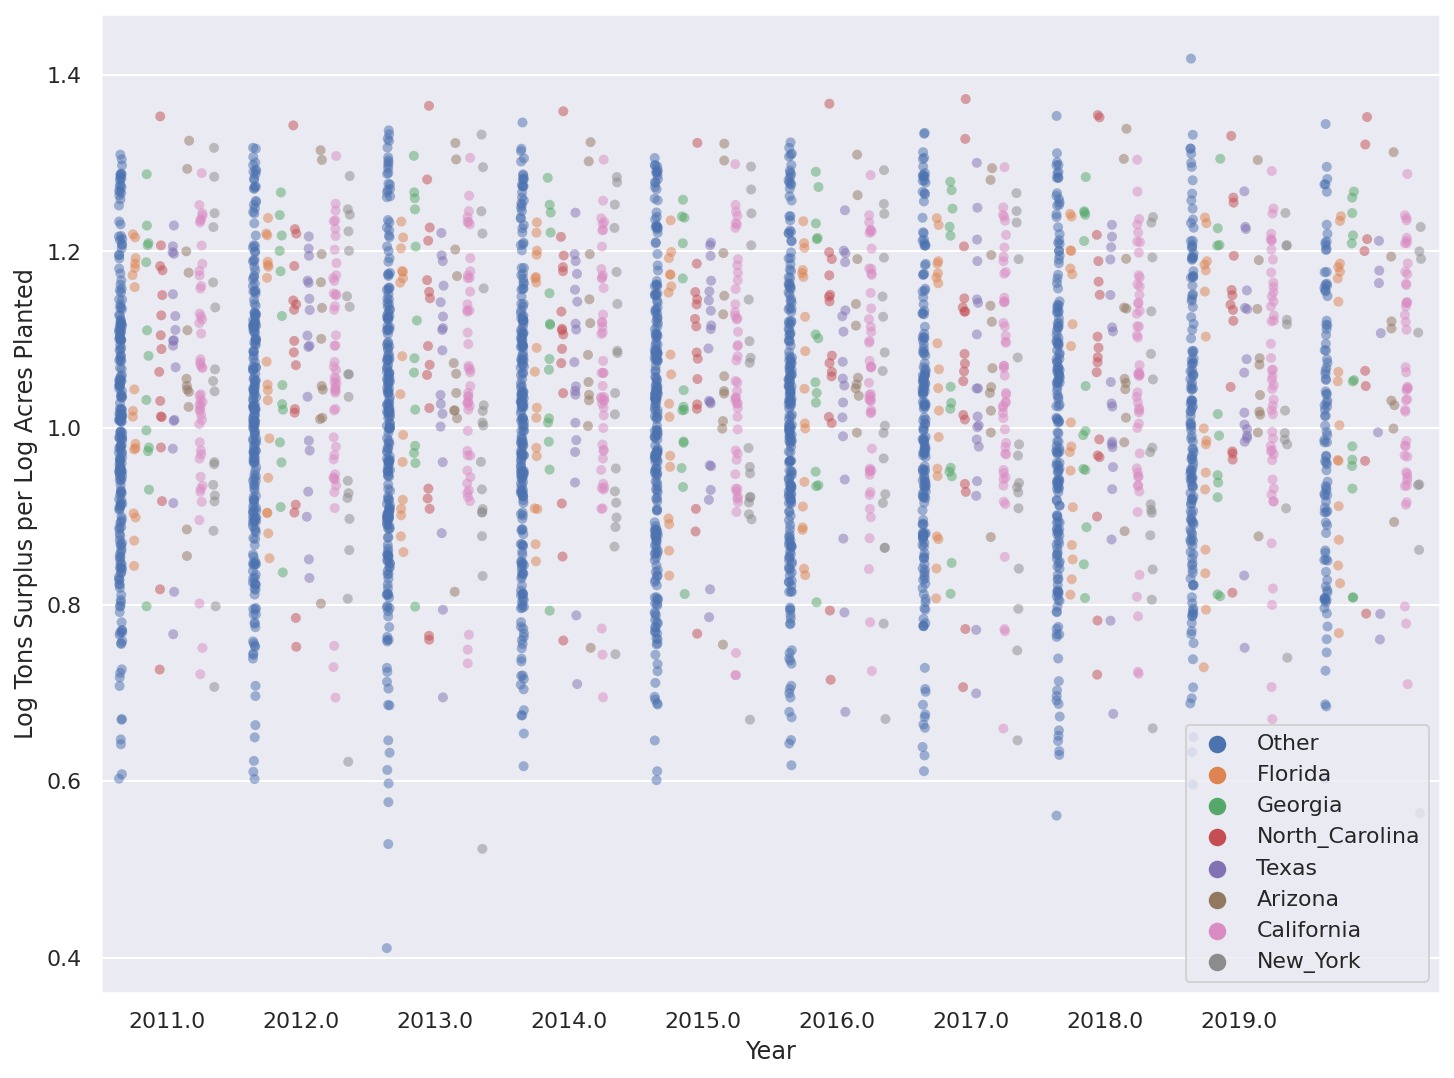

In [ ]:
PLOT_STATES = ['Florida', 'Georgia', 'North_Carolina', 'Texas', 'Arizona', 'California', 'New_York', 'Washinagton']

refed["Plot state"] = (refed["cat.state"]
                                .where(refed["cat.state"].isin(PLOT_STATES),
                                       "Other"))
state_plot_min_year = (refed[refed["cat.state"].isin(PLOT_STATES)]
                             ["cat.year"]
                             .sub(1)
                             .min())



fig, ax = plt.subplots(figsize=1.5 * FIG_SIZE)

sns.stripplot(
    x="cat.year", y="LLTS/AP", hue="Plot state",
    data=refed[refed["cat.year"] >= state_plot_min_year],
    dodge=True, alpha=0.5, ax=ax
);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1));

#ax.set_ylim(0.25, 1.5);
ax.set_ylabel("Log Tons Surplus per Log Acres Planted");
ax.set_xlabel("Year");

ax.legend();

In [ ]:
def gaussian_random_walk(name, *, dims, innov_scale=1.):
    Δ = pm.Normal(f"Δ_{name}", 0., innov_scale,  dims=dims)

    return pm.Deterministic(name, Δ.cumsum(), dims=dims)

def noncentered_normal(name, *, dims, μ=None):
    μ = pm.Normal(f"μ_{name}", 0., 2.5)
    Δ = pm.Normal(f"Δ_{name}", 0., 1., dims=dims)
    σ = pm.HalfNormal(f"σ_{name}", 2.5)
    
    return pm.Deterministic(name, μ + Δ * σ, dims=dims)

In [ ]:
#Statndardizing Log Transformation of Acres Planted

log_acres_planted = (refed["acres_planted"]
                     .pipe(np.log)
                     .values)

scaler = StandardScaler().fit(log_acres_planted[:, np.newaxis])

def scale_log_acres_planted(log_acres_planted, scaler=scaler):
    return scaler.transform(log_acres_planted[:, np.newaxis])[:, 0]

std_log_acres_planted = scale_log_acres_planted(log_acres_planted)

In [ ]:
#Statndardizing Log Transformation of US Dollars Harvested

log_usd_harvested = (refed["us_dollars_harvested"]
                     .pipe(np.log)
                     .values)

scaler = StandardScaler().fit(log_usd_harvested[:, np.newaxis])

def scale_log_usd_harvested(log_usd_harvested, scaler=scaler):
    return scaler.transform(log_usd_harvested[:, np.newaxis])[:, 0]

std_log_usd_harvested = scale_log_usd_harvested(log_usd_harvested)

In [ ]:
# Log Transforming Tons Surplus

log_tons_surplus = (refed["tons_surplus.tons_surplus"]
                      .pipe(np.log)
                      .values)

In [ ]:
# Ecoding states numerically
state_id, state_map = refed["cat.state"].factorize(sort=True)

# Transforming years to number of years after 2010
t, years = refed["cat.year"].factorize(sort=True)

# Ecoding  commodity numerically
commodity_id, commodity_map = refed["cat.commodity"].factorize(sort=True)

In [ ]:
coords = {
    "set": refed.index,
    "state": state_map,
    "year": years,
    "commodity": commodity_map
}

In [ ]:
SEED = 192826


with pm.Model(coords=coords) as farm_model:
    β0_t = gaussian_random_walk("β0_t", dims="year", innov_scale=0.1)
    β0_state = noncentered_normal("β0_state", dims="state")
    β0_commodity = noncentered_normal("β0_commodity", dims="commodity")

In [ ]:
with farm_model:
    β_acres_planted_t = gaussian_random_walk("β_acres_planted_t", dims="year", innov_scale=0.1)
    β_acres_planted_state = noncentered_normal("β_acres_planted_state", dims="state")
    β_acres_planted_commodity = noncentered_normal("β_acres_planted_commodity", dims="commodity")
    β_usd_harvested_t = gaussian_random_walk("β_usd_harvested_t", dims="year", innov_scale=0.1)
    β_usd_harvested_state = noncentered_normal("β_usd_harvested_state", dims="state")
    β_usd_harvested_commodity = noncentered_normal("β_usd_harvested_commodity", dims="commodity")

In [ ]:
with farm_model:
    σ = pm.HalfNormal("σ", 20.)
    μ = β0_t[t] + β0_state[state_id] + β0_commodity[commodity_id]\
        + (β_acres_planted_t[t] + β_acres_planted_state[state_id]) + β_acres_planted_commodity[commodity_id] * std_log_acres_planted \
        + (β_usd_harvested_t[t] + β_usd_harvested_state[state_id]) + β_usd_harvested_commodity[commodity_id] * std_log_usd_harvested \
        - 0.5 * σ**2

# The term - 0.5 * σ**2 in the definiton of μ comes from the fact that this linear model of log farm surplus in terms of 
# log acreage and log us dollars harvested is equivalent to a multiplicative model of price in terms of acreage and us dollars harvested.

In [ ]:
# specify the likelihood of the observed log tons surplus

with farm_model:
    obs = pm.Normal("obs", μ, σ, dims="set", observed=log_tons_surplus)

/usr/local/lib/python3.7/dist-packages/pymc/model.py:1431: ImputationWarning: Data in obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [ ]:
jax.local_device_count()

1

In [ ]:


# sample from the posterior distribution of this model using adaptive HMC (NUTS)

CORES = 10

SAMPLE_KWARGS = { # Not using this for now
    'draws': 1e3,
    'tune': 1e3,
    'chains': CORES,
    'random_seed': (SEED + np.arange(CORES)).tolist()
}

# with farm_model:
#     farm_trace = pm.sampling_jax.sample_numpyro_nuts(**SAMPLE_KWARGS)

with farm_model:
  farm_trace = pm.sampling_jax.sample_numpyro_nuts(
      draws = 1000,
      tune = 500,
      chains = 10,
      target_accept = 0.9,
      random_seed = SEED
  )

Compiling...


KeyboardInterrupt: ignored

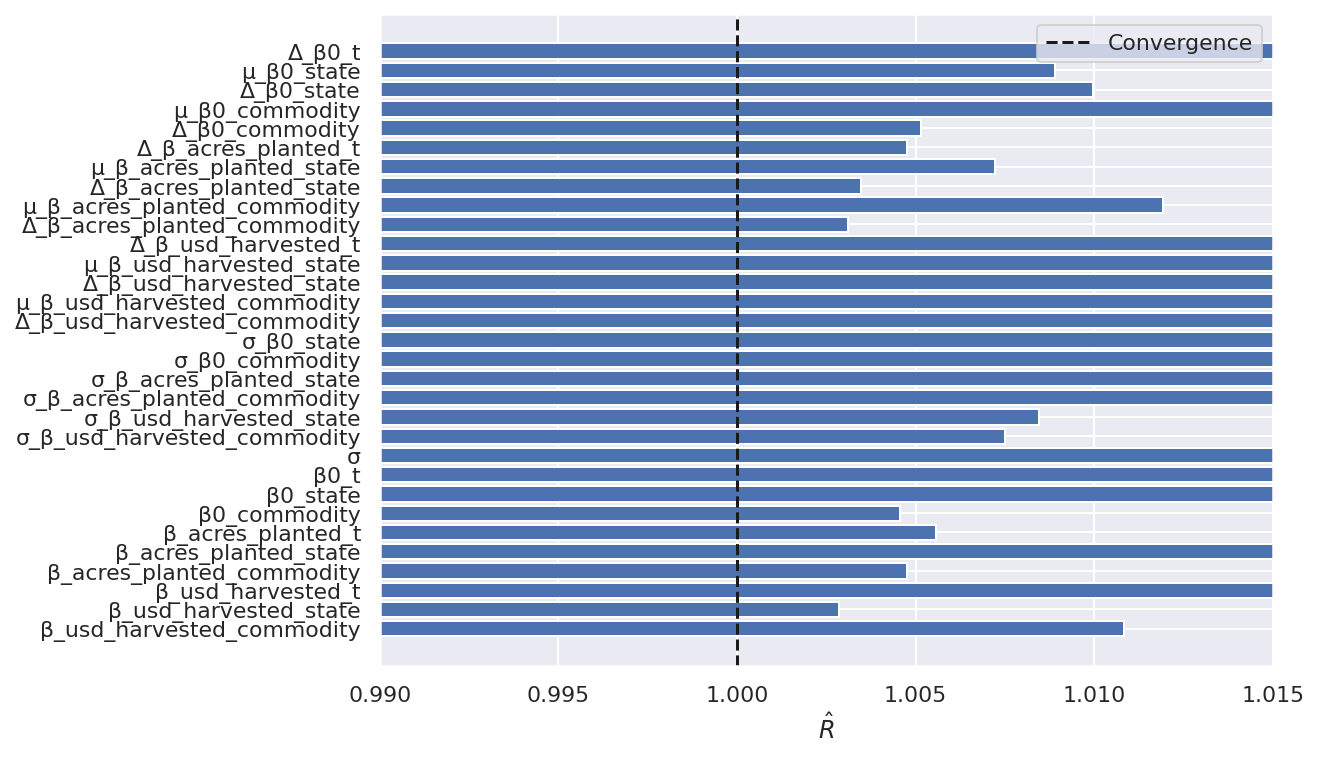

In [ ]:
#!pip install arviz
import arviz as az
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

max_rhat = (az.rhat(farm_trace)
               .max()
               .to_array())
nvar, = max_rhat.shape

ax.barh(np.arange(nvar), max_rhat);
ax.axvline(1, c='k', ls='--', label="Convergence");

ax.set_xlim(0.99, 1.015);
ax.set_xlabel(r"$\hat{R}$");

ax.set_yticks(np.arange(nvar));
ax.set_yticklabels(max_rhat.coords["variable"].to_numpy()[::-1]);

ax.legend();

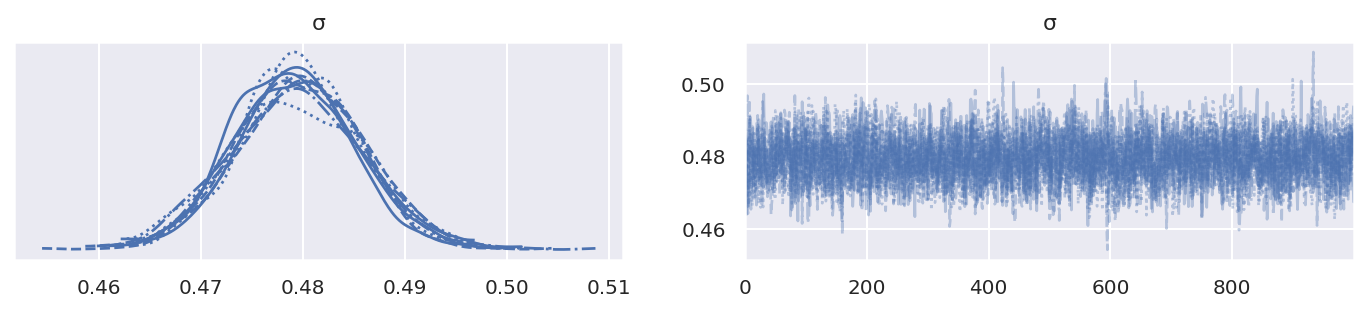

In [ ]:
az.plot_trace(farm_trace, var_names= "σ");

In [ ]:
#  sample from the model's posterior predictive distribution

with farm_model:
    pp_trace = pm.sample_posterior_predictive(farm_trace)

In [ ]:
def format_posterior_artist(artist, formatter):
    text = artist.get_text()
    x, _ = artist.get_position()

    if text.startswith(" ") or text.endswith(" "):
        fmtd_text = formatter(x)
        artist.set_text(
            " " + fmtd_text if text.startswith(" ") else fmtd_text + " "
        )
    elif "=" in text:
        before, _ = text.split("=")
        artist.set_text("=".join((before, formatter(x))))
    elif "<" in text:
        below, ref_val_str, above = text.split("<")
        artist.set_text("<".join((
            below,
            " " + formatter(float(ref_val_str)) + " ",
            above
        )))

def format_posterior_text(formatter, ax=None):
    if ax is None:
        ax = plt.gca()
    
    #artists = [artist for artist in ax.get_children() if isinstance(artist, plt.Text)]
    peanuts = [
        peanut for peanut in ax if isinstance(peanut, plt.Text)
    ]
    
    for peanut in peanuts:
        format_posterior_artist(peanut, formatter)

In [ ]:
ax = az.plot_posterior(
    pp_trace, group='posterior_predictive',#coords= {"set": PEANUTS},
    transform=np.exp, ref_val = refed.loc[PEANUTS, "tons_surplus.tons_surplus"]
);

# format_posterior_text(dollar_formatter, ax=ax);

# ax.set_xlabel("Posterior predicted Tons Surplus for Peanuts");
# ax.set_title("Credible Interval of Farm Wastage for Peanuts");

ax[0][1]

In [ ]:
farm_trace.to_json('/content/farm_trace.json')

In [ ]:
import arviz as az
farm_trace = az.from_json('/content/farm_trace.json')

In [ ]:
az.plot_trace(farm_trace, figsize = (25, 25));